# ReLU activation

In [2]:
import matplotlib.pyplot as plt

plt.style.use("utils/deeplearning.mplstyle")


import warnings

from utils.autils import plt_act_trio
from utils.lab_utils_relu import *

warnings.simplefilter(action="ignore", category=UserWarning)

<a name="2"></a>
## 2 - ReLU Activation
This week, a new activation was introduced, the Rectified Linear Unit (ReLU). 
$$a = \text{max}(0,z)$$

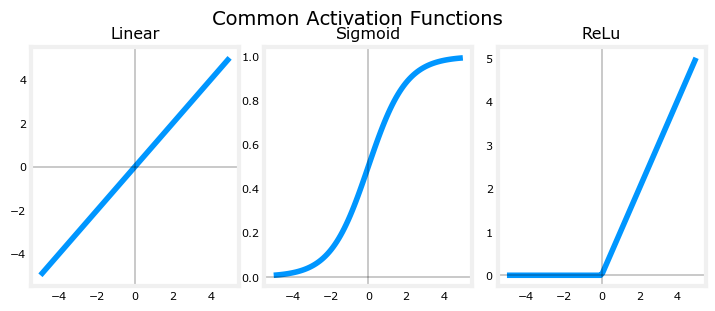

In [3]:
plt_act_trio()

<center> <img  src="images/C2_W2_ReLu.png" width="600" />   </center>

The example above shows an application of the ReLU. In this example, the derived "awareness" feature is not binary but has a continuous range of values. The sigmoid is best for on/off or binary situations. The ReLU provides a continuous linear relationship. Additionally it has an 'off' range where the output is zero. The "off" feature makes the ReLU a Non-Linear activation. Why is this needed? Let's examine this below. 

### Why Non-Linear Activations?  

<center> <img  src="images/C2_W2_ReLU_Graph.png" width="400" />   </center>

The function shown is composed of linear pieces (piecewise linear). The slope is consistent during the linear portion and then changes abruptly at transition points. At transition points, a new linear function is added which, when added to the existing function, will produce the new slope. The new function is added at transition point but does not contribute to the output prior to that point. The non-linear activation function is responsible for disabling the input prior to and sometimes after the transition points. The following exercise provides a more tangible example.

The exercise will use the network below in a **regression problem** where we must model a piecewise linear target:

<center> <img  src="images/C2_W2_ReLU_Network.png" width="600" />   </center>  

The network has 3 units in the first layer. Each is required to form the target. Unit 0 is pre-programmed and fixed to map the first segment. We will modify weights and biases in unit 1 and 2 of the first layer to model the 2nd and 3rd segment. The output unit is also fixed and simply sums the outputs of the first layer.  

Using the sliders below, modify weights and bias to match the target. 

Hints: Start with `w1` and `b1` and leave `w2` and `b2` zero until we match the 2nd segment. Clicking rather than sliding is quicker.

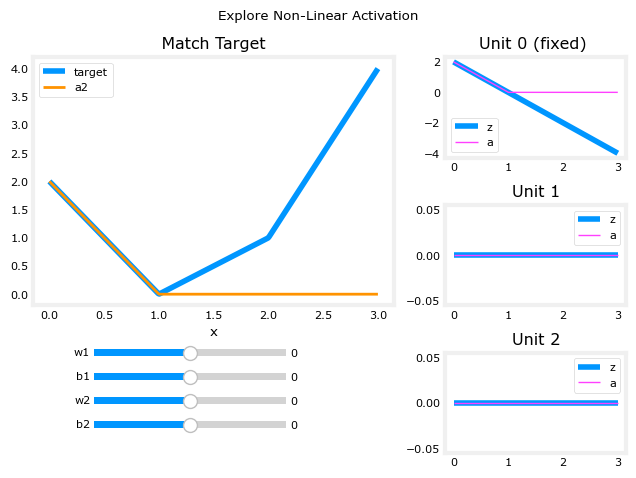

In [4]:
_ = plt_relu_ex()

 
The goal of this exercise is to appreciate how the ReLU's non-linear behavior provides the needed ability to turn functions off until they are needed. Let's see how this worked in this example.

<center> <img  src="images/C2_W2_ReLU_Plot.png" width="800" />   </center>  

The plots on the right contain the output of the three units in the first layer.  

* Starting at the top, unit 0 is responsible for the first segment marked with a blue circle containing 1. Both the linear function $z$ and the function following the ReLU $a$ are shown. As can be seen, the ReLU cuts off (meaning the pink curve for unit 0 becomes 0) the function after the interval [0,1], even when the linear function $z$ is has domain covering $x\ge1$. This is important as it prevents Unit 0 from interfering with the following segments. 

* Unit 1 is responsible for the 2nd segment with a blue circle containing 2. Here, the ReLU kept this unit quiet (meaning the pink curve is 0) until after x is 1. Since the first unit is not contributing, the slope for unit 1, $w^{[1]}_1$, is just the slope of the target line. The bias must be adjusted to keep the output negative until x has reached 1. Note how the contribution of Unit 1 extends to the 3rd segment as well.

* Unit 2 is responsible for the 3rd segment with a blue circle containing 3. The ReLU again zeros the output until x reaches the right value $x \ge 2$. The slope of the unit, $w^{[1]}_2$, must be set so that the sum of unit 1 and 2 have the desired slope. The bias is again adjusted to keep the output negative until x has reached 2. 

The "off" or disable feature of the ReLU activation enables models to stitch together linear segments to model complex non-linear functions.
